In [6]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, \
    hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [7]:
hom_freezing_types_all = [  "KoopMurray2016", "Spichtinger2023", "threshold"  ]
backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

standard["dz"] = 0.5 * si.meter
standard["RH_0"] = 1.
standard["T0"] = 238. * si.kelvin
standard["r_mean_droplet_distribution"] = 20. * si.micrometer
standard["n_sd"] = 100
standard["condensation_enable"] = True
standard["deposition_enable"] = False

print(standard)

{'n_sd': 100, 'w_updraft': 1.0, 'T0': 238.0, 'dz': 0.5, 'N_dv_droplet_distribution': 749999999.9999999, 'r_mean_droplet_distribution': 1.9999999999999998e-05, 'type_droplet_distribution': 'monodisperse', 'RH_0': 1.0, 'p0': 50000.0, 'condensation_enable': True, 'deposition_enable': False, 'deposition_adaptive': True, 'number_of_ensemble_runs': 1}


In [8]:
simulations = []
for hom_freezing_type in hom_freezing_types_all:
       setting_dict = {
            **standard,
           "backend": backends[hom_freezing_type],
           "hom_freezing": hom_freezing_type,
       }
       simulations.append(run_simulations(setting_dict))

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=749999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for Spichtinger2023 with wpdraft=1.0 and n_sd=100 and n_dv=749999999.9999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for threshold with wpdraft=1.0 and n_sd=100 and n_dv=749999999.9999999
Starting simulation...
all particles frozen or evaporated


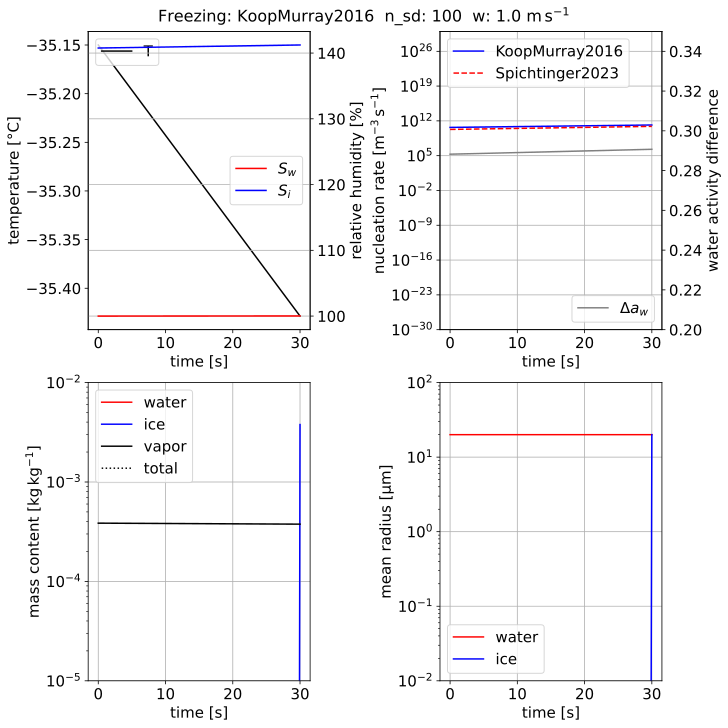

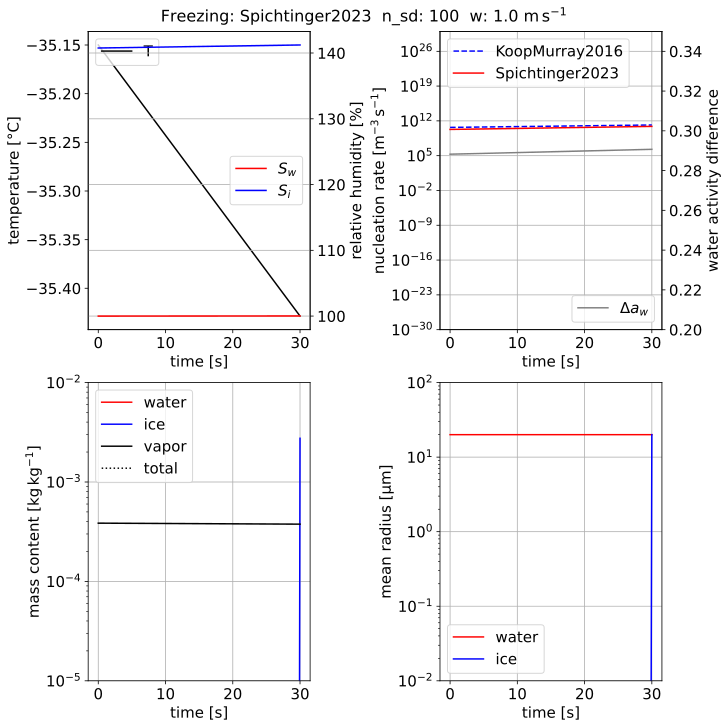

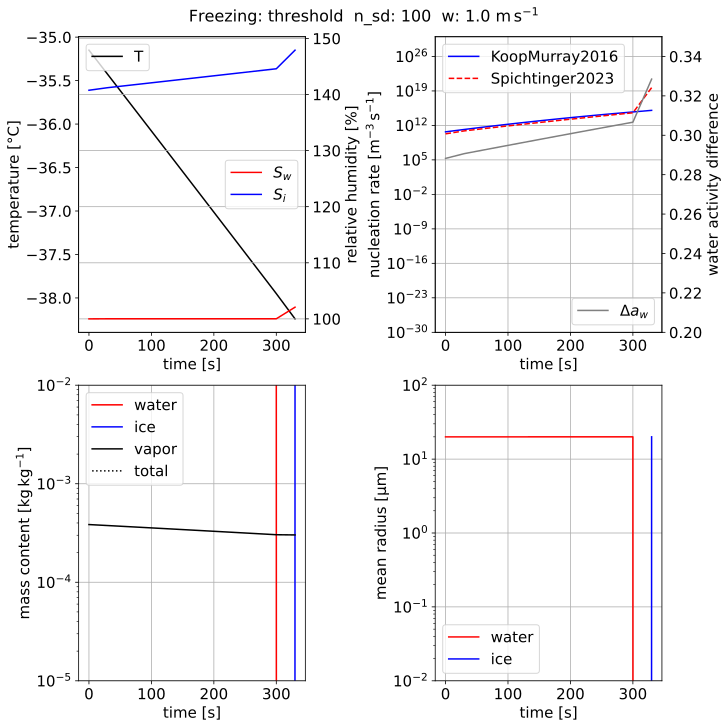

In [9]:
for simulation in simulations:
    plot.plot_thermodynamics_and_bulk(simulation)

[nan, nan, nan, nan, nan, nan, nan, nan, 237.81898379020535, nan, nan, 237.87006845489105, nan, nan, nan, 237.9257843688735, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 237.93042436413086, nan, nan, nan, 237.82827564578733, nan, nan, 237.75860062495494, nan, 237.9397115572864, nan, nan, nan, nan, nan, nan, nan, 237.92113836472623, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 237.74001645284693, nan, nan, nan, nan, nan, nan, 237.74466199439496, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 237.81434140434985, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[np.float64(2.0000000000000025e-05), np.float64(2.00017921196403e-05)]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 237.8840062293968, nan, nan, nan, nan, nan, nan, nan, nan, nan, 237.74002173673264, nan, nan, nan, 237.79577164991227, nan, nan, nan, 

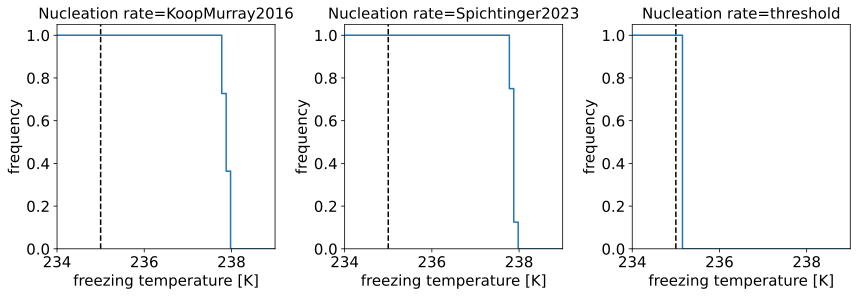

In [10]:
fig, axs = pyplot.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
axs = axs.ravel()
i = 0
for simulation in simulations:
    print(simulation["ensemble_member_outputs"][0]["T_frz"])
    print(simulation["ensemble_member_outputs"][0]["rs"])
    axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
    i += 1
show_plot("fig_simple_hom_freezing_histogram")